# CS-GY-66143 - MIDTERM EXAM SPRING 2024

Please upload this problem in Brightspace together with your answers to the in-person portion. You need to submit your github URL and include this notebook with your answers for 1A and 1C in the same folder that you have answered 1B.  

## PROBLEM 1: A JOURNEY THROUGH INFORMATION THEORY AND NEURAL NETWORKS (30 POINTS)

### Introduction

Information theory was introduced by Claude Shannon in 1948. It is a mathematical theory that deals with the transmission, processing, utilization, and extraction of information. It has given rise to a wide range of applications, including data compression, cryptography, error correction and fueled other industries such as AI, cellular communications and others.

In this problem, we will use key concepts from information theory aiming in opening up the internals of neural networks and potentially explain how statistical learning theory and information theory can explain their behavior.

The journey begins with [this reference](https://arxiv.org/abs/2206.07867) that you need to study before attempting the problem below.

### PS 1A: Information Theory Basics (5 points)

Let (x, y) have the following joint distribution:

![](joint-distribution.png)

If H is the symbol for the entropy functional, answer quantitatively showing your calculations

a.  if H(x|y)=H(y|x) and if H(x) - H(x|y) =H(y)-H(y|x).

b. Calculate the mutual information I(x,y)



# Solution Part 1A:
Given the following equations:

$$H(x \mid y) = −\sum_{i, j}​P(xi​,yj​)\cdot\log_2​(P(x_i \mid y_j​)$$

$$ P(x|y) = \frac{P(x, y)}{P(y)} $$

$$H(y \mid x) = −\sum_{i, j}​P(x_i​,y_j​)\cdot\log_2​(P(y_j​,x_i​)P(x_i​)$$

$$ P(y|x) = \frac{P(x, y)}{P(x)} $$

$$H(x) = −\sum_{i}​P(x_i​​)\cdot\log_2​P(x_i​)$$

$$H(y) = −\sum_{i}​P(y_i​​)\cdot\log_2​P(y_i​)$$

We get the marginal probabilities $P(Y)$ as $[1/4, 1/4, 1/4, 1/4]$ and $P(X)$ as $[1/2, 1/4, 1/8, 1/8]$ by summing the joint probabilities of the columns and rows, respectively. We can then use this to expand the equations above:
<br><br>
$$H(x) = - \left( \frac{1}{2} \cdot \log_2(\frac{1}{2}) + \frac{1}{4} \cdot \log_2(\frac{1}{4}) + \frac{1}{8} \cdot \log_2(\frac{1}{8}) + \frac{1}{8} \cdot \log_2(\frac{1}{8}) \right)$$
<br><br>
$$H(y) = -4 \cdot \left( \frac{1}{4} \cdot \log_2(\frac{1}{4}) \right)$$
<br><br>
$$H(x \mid y) = - \left(\frac{1}{8} \cdot \log_2(\frac{1}{2}) + \frac{1}{16} \cdot \log_2(\frac{1}{4}) + \frac{1}{32} \cdot \log_2(\frac{1}{8}) + \frac{1}{32} \cdot \log_2(\frac{1}{8}) \right)$$
$$- \left( \frac{1}{16} \cdot \log_2(\frac{1}{4}) + \frac{1}{8} \cdot \log_2(\frac{1}{2}) + \frac{1}{32} \cdot \log_2(\frac{1}{8}) + \frac{1}{32} \cdot \log_2(\frac{1}{8})\right)$$
$$-4 \cdot \left(\frac{1}{16} \cdot \log_2(\frac{1}{4}) \right)$$
$$- \left( \frac{1}{4} \cdot \log_2(\frac{1}{2})\right)$$
<br><br>
$$H(y \mid x) = -\left( \frac{1}{8} \cdot \log_2(\frac{1}{4}) + \frac{1}{16} \cdot \log_2(\frac{1}{8}) +  \frac{1}{16} \cdot \log_2(\frac{1}{8}) + \frac{1}{4} \cdot \log_2(\frac{1}{2})\right)$$
$$-\left( \frac{1}{16} \cdot \log_2(\frac{1}{4}) + \frac{1}{8} \cdot \log_2(\frac{1}{2}) + \frac{1}{16} \cdot \log_2(\frac{1}{4})\right)$$
$$- \left( \frac{1}{32} \cdot \log_2(\frac{1}{4}) + \frac{1}{32} \cdot \log_2(\frac{1}{4}) + \frac{1}{16} \cdot \log_2(\frac{1}{2}) \right)$$
$$- \left( \frac{1}{32} \cdot \log_2(\frac{1}{4}) + \frac{1}{32} \cdot \log_2(\frac{1}{4}) + \frac{1}{16} \cdot \log_2(\frac{1}{2}) \right)$$

<br><br>
I set up a pair of functions to calculate the actual values for $H(x), H(x), H(x|y)$ and $H(y|x)$ using the given joint distribution table and the manually calculated marginal probabilities for x and y. My final answers can be seen in the output below

In [ ]:
from math import log2

def calculate_conditional_entropy(joint_probs, marginal_probs):
    conditional_entropy = 0

    for y in range(len(joint_probs[0])):
        for x in range(len(joint_probs)):
            joint_prob = joint_probs[x][y]
            if joint_prob > 0:  # Exclude cases where joint probability is zero
                conditional_prob = joint_prob / marginal_probs[y]
                conditional_entropy += joint_prob * log2(conditional_prob)

    return -conditional_entropy

def calculate_entropy(marginal_probs):
    entropy = 0
    for prob in marginal_probs:
        if prob > 0:  # Exclude cases where probability is zero
            entropy += prob * log2(prob)
    return -entropy

joint_probs = [ # copied from the given joint distribution table
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0]
]

marginal_probs_x = [1/2, 1/4, 1/8, 1/8] # manually calculated as the sum of each column
marginal_probs_y = [1/4, 1/4, 1/4, 1/4] # manually calculated as the sum of each row

conditional_entropy_given_y = calculate_conditional_entropy(joint_probs, marginal_probs_y)
conditional_entropy_given_x = calculate_conditional_entropy(joint_probs, marginal_probs_x)

entropy_y = calculate_entropy(marginal_probs_y)
entropy_x = calculate_entropy(marginal_probs_x)

print("H(x) =", entropy_x)
print("H(y) =", entropy_y)
print()
print("H(x|y) =", conditional_entropy_given_y)
print("H(y|x) =", conditional_entropy_given_x)
print()
print("H(x) - H(x|y) = ", entropy_x - conditional_entropy_given_y)
print("H(y) - H(y|x) = ", entropy_y - conditional_entropy_given_x)

H(x) = 1.75
H(y) = 2.0

H(x|y) = 1.375
H(y|x) = 1.625

H(x) - H(x|y) =  0.375
H(y) - H(y|x) =  0.375


#Summary Part 1A subsection a:

Given the above calculations, we can conclude that $H(x \mid y)$ does not equal $H(y \mid x)$, but that $H(x) - H(x \mid y)$ and $H(y) - H(y \mid x)$ are indeed equivalent. This is not surprising given that both $H(x) - H(x \mid y)$ and $H(y) - H(y \mid x)$, as well as $H(x) + H(y) − H(x, y)$, are all different forms of defining mutual information, $I(x; y)$, as stated on the bottom of page 14 of [A Visual Introduction to Information Theory](https://arxiv.org/pdf/2206.07867.pdf)

# Solution Part 1A subsection b:

As mentioned in the Summary of part 1A subsection a,

$$I(x; y) = H(x) - H(x \mid y) = H(y) - H(y \mid x)$$

As we have already calculated $H(x) - H(x \mid y) = H(y) - H(y \mid x) = 0.375$, we know that:

 $$I(x; y) = 0.375$$

### PS 1B: Tishby's Information Bottleneck (20 points)

In this seminal [paper](https://arxiv.org/abs/1703.00810), Tishby et al. propose a new framework for understanding the learning dynamics of deep neural networks. They argue that the learning process can be understood as an information bottleneck. This is [very nice video summary](https://www.youtube.com/watch?v=bLqJHjXihK8) of the key findings.

Clone this repo https://github.com/pantelis/IDNNs and using the VSCode remote container extension, open the cloned repo in the tensorflow container. Please note the Dockerfile specification under the /docker folder - you may need to change the Dockerfile to use a CPU, for example, base image depending on your environment.

a. Run the code in the repo and plot the training process on the information plane such as in the video and the figure below.

![](information-plane.jpg)

b. Add a folder `midterm-take-home` in your existing assignments repo.  Design a CNN classification network that can classify [the CIFAR10 dataset](https://huggingface.co/datasets/cifar10)  and introduce the information measures that the IDNN repo has introduced to produce the information plane and gradient mean and variance figures.

Note that IDNN repo is based on the old version of tensorflow and you need to update the code to the latest version of tensorflow or pytorch. Both frameworks they need to be in their latest (but stable) version. Luckily a good chunk of supporting functions are framework independent.

The new code should be in script *.py files but a tutorial notebook must also exist that links to the functions of the scripts and using markdown cells explains what the code is trying to do. Do not hesitate to use latex formulas to explain the concepts. Your focus in this tutorial treatment is on computational aspects and not on the information theoretic bounds outlined at some point in the video.  


# Information Bottleneck Implementation

Given I have a 5-year-old x86 Mac, developing locally was not an option for me. I had run out of compute units on Colab, and tried to develop remotely on a GCP VM rather than spending $50 on a Pro+ upgrade. As I had never actually done this before, it took a few hours to set up and get a working SSH connection, in large part due to inconsistent GPU availability on GCP. At one point I paused my instance to start again in the morning, only to find zero GPU availability across regions for an entire day, and only managed to start up a new instance the following day in the early, off-peak hours by trying every region with T4 availability, eventually securing an instance somewhere around Salt Lake City. This led to a 2-day delay in being able to even touch the code. Once I had finally secured a working VM and established an SSH connection through VSCode, I found that developing within the docker container running on my VM was more difficult than I'd imagined. Even after managing to build the dev container through VSCode, the connection was extremely slow, and my SSH connection routinely timed out, but seemed to leave an open connection on the VM's side that I would have to wait to close on its own before I could re-establish a connection on my end. This was a frustrating experience. I managed to work with the code by running the container interactively through my VSCode terminal, and even got the main code running and plotting the gradient with the default settings, fixing some of the bugs and the broken imports by editing the code itself with Nano. This was obviously not a tenable solution though, as the plots themselves had to be saved to disk for me to access them, and this would never work with a Jupyter notebook as specified in the instructions. I am sure many of these problems come down to my own inexperience, but ultimately I realized I was not going to be able to make this work before the deadline, and decided I would be better served by diving into Tishby's work on a conceptual level and attempting to answer the last section as best as I could. I also did design a simple CNN, which I trained and tested using CIFAR-10 below

# Design and Preliminary Testing of CNN Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0  # Normalize pixel values to be between 0 and 1

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the test set
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print("\nTest accuracy:", val_acc)

Epoch 1/10
1563/1563 [==============================] - 102s 64ms/step - loss: 1.6118 - accuracy: 0.4359 - val_loss: 1.4930 - val_accuracy: 0.4753
Epoch 2/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.2238 - accuracy: 0.5676 - val_loss: 1.1414 - val_accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.0654 - accuracy: 0.6299 - val_loss: 1.2744 - val_accuracy: 0.5655
Epoch 4/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9650 - accuracy: 0.6653 - val_loss: 1.2481 - val_accuracy: 0.5829
Epoch 5/10
1563/1563 [==============================] - 98s 62ms/step - loss: 0.8996 - accuracy: 0.6861 - val_loss: 1.0392 - val_accuracy: 0.6497
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8430 - accuracy: 0.7070 - val_loss: 1.0584 - val_accuracy: 0.6403
Epoch 7/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7984 - accuracy: 0.7258 - val_loss: 0.

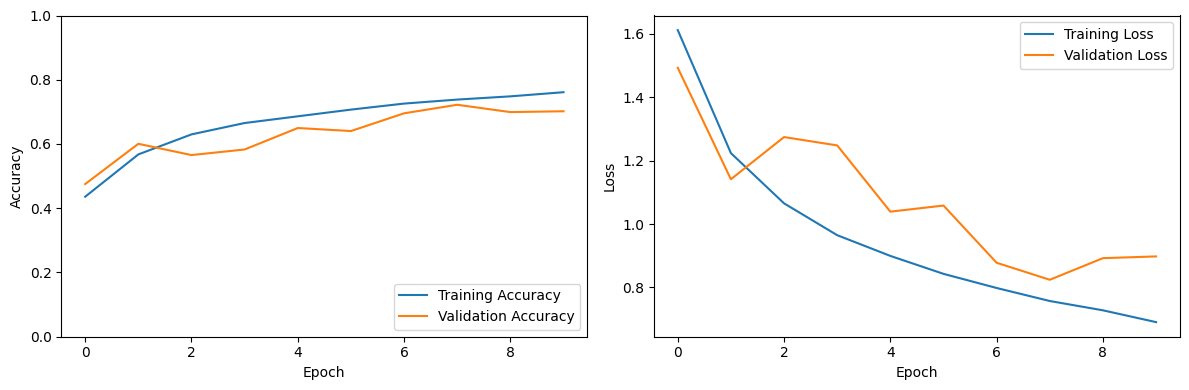

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### PS 1C: Commentary (5 points)

Write a commentary on the findings of your own experiment (1B) highlighting the key findings in a similar way that Tishby et al. have done in their paper / video.


# 1C Commentary:

## Tishby Paper

The three most important findings of Tishby's paper can be summarized as 1) There are two distinct phases in DL training through SGD mini-batch optimizations: the empirical error minimalization (ERM), where the model is learning to actually fit the data, and second, the representation compression phase; 2) The representation compression phase takes up the majority of training time, which implies that "most of the training epochs in standard DL are spent on compression of the input to efficient representation and not on fitting the training labels" ([Tishby, Shwartz-Ziv p. 1](https://arxiv.org/abs/1703.00810)) 3) The third, and arguably most important finding of the paper, is that of the Information Bottleneck theoretical bound for DNNs.
<br><br>
By defining neural networks as a Markov Chain of successive representations of the input layer, where each hidden layer produces a different representation, $T_i$, of the input, X, Tishby is able to treat the representations produced by the hidden layers as a single variable, T, basically the final, compressed representation of X within the hidden layers, and thereby defines two distinct mutual information measures, I(X;T) and I(T;Y), where X is the input and Y the predicted output.
<br><br>
In an earlier [paper](https://arxiv.org/abs/physics/0004057), Tishby and Shwartz-Ziv defined the Information Bottleneck (IB), which essentially corresponds to minimizing I(X;T) and maximizing I(T;Y). A minimal I(X;T) represents a highly compressed representation of X, but paired with a high I(T;Y), we see that T contains as much relevant information as possible for producing the predicted label Y, while ignoring irrelevant information by compressing X down to its most essential features. That is, we get the most amount of information about the label Y from the most compressed possible representation of X.
<br><br>
During the ERM phase, the gradient norms are far larger than their respective stochastic fluctuations, which leads to a rapid increase in I(T;Y). As can be seen in Tishby's video presentation, there is also an increase in I(X;T), as the randomly initialized model begins to better fit the input data. The representation compression phase occupied the majority of the epochs in each example, and was marked by a slow increase in I(T;Y) for all of the layers in the network, as well as a decrease in I(X;T) as the compressed representation shared progressively fewer bits of information with the input, X. With large enough training samples this will approach the optimal IB bound. Importantly, Tishby and Shwartz-Ziv also show that adding hidden layers to a DNN will exponentially decrease the number of training samples required to approach the IB bound.
<br><br>
Generalization is improved as compression increases. knee affects gradient. Initially high signal to noise gradient (mean higher than std). When error saturates at the knee, this relationship reverses and the gradient becomes noisier, largely due to behavior of mini-batch SGD. Signal to noise ratio related to I(T;Y). Higher noise in earlier layers due to noise backpropagating


## CNN Design
Would be interesting to see if there's any difference between Adam and pure SGD, so chose Adam, and also added a Dropout layer to see if that had any effect vs Tishby's vanilla implementation.
Tried to strike a balance between adding enough hidden layers to require fewer epochs (as per Tishby paper), and not having too many parameters to blow up my RAM.
Following the discussion brought up by [this paper](https://openreview.net/forum?id=ry_WPG-A-), I would predict that my model would not actually reproduce Tishby's results, as it seems the compression phase does not occur when using the ReLU activation function without modifying the code to account for it's nonlinearity.